In [268]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import spearmanr
from scipy.stats import f_oneway
from statsmodels.stats import weightstats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.descriptivestats import sign_test
import numpy as np
import scipy.stats as stats
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme("notebook") 
sns.set_palette("Set2") 

Домашнее задание
В процессе анализа вы должны ответить на ключевые вопросы HR-агентства:

1 Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
2 Какие факторы влияют на зарплату у специалистов Data Scientist?
3 Как соотносятся зарплаты Data Scientist и Data Engineer в различных компаниях?
4 Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
5 Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов: тесты для количественного признака:
для одной выборки;
для двух выборок;
для нескольких выборок;
тест для категориальных признаков.

work_year	Год, в котором была выплачена зарплата.
experience_level	Опыт работы на этой должности в течение года со следующими возможными значениями: EN — Entry-level/Junior; MI — Mid-level/Intermediate; SE — Senior-level/Expert; EX — Executive-level/Director.
employment_type	Тип трудоустройства для этой роли: PT — неполный рабочий день; FT — полный рабочий день; CT — контракт; FL — фриланс.
job_title	Роль, в которой соискатель работал в течение года.
salary	Общая выплаченная валовая сумма заработной платы.
salary_currency	Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
salary_in_usd	Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
employee_residence	Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
remote_ratio	Общий объём работы, выполняемой удалённо. Возможные значения: 0 — удалённой работы нет (менее 20 %); 50 — частично удалённая работа; 100 — полностью удалённая работа (более 80 %).
company_location	Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
company_size	Среднее количество людей, работавших в компании в течение года: S — менее 50 сотрудников (небольшая компания); M — от 50 до 250 сотрудников (средняя компания); L — более 250 сотрудников (крупная компания).

In [240]:
data = pd.read_csv('C:\Temp\Pythone/ds_salaries.csv')
data.head(1)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [138]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 0
Размер таблицы после удаления дубликатов: (607, 12)


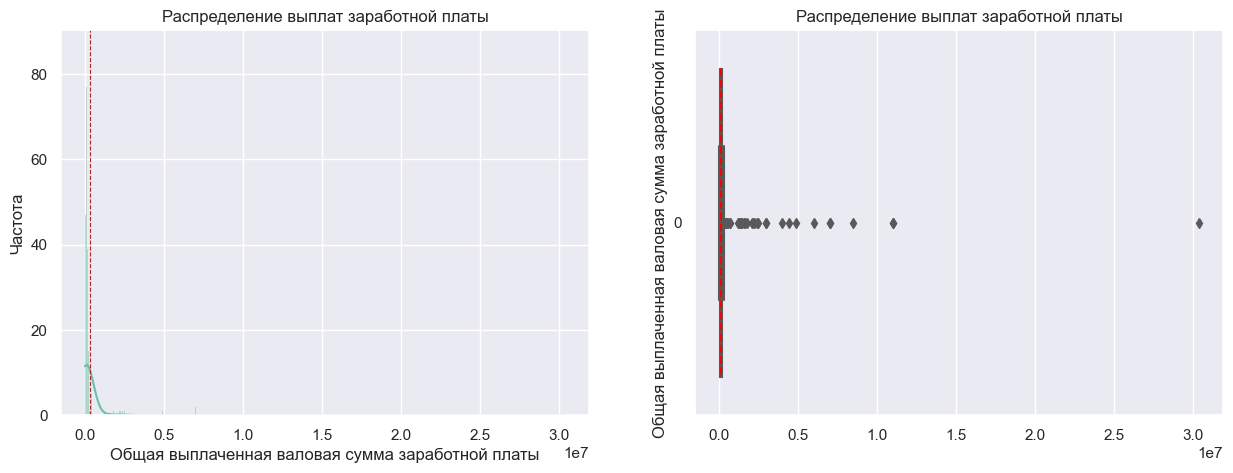

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['salary'], kde=True, ax=axes[0])
axes[0].set(xlabel='Общая выплаченная валовая сумма заработной платы', ylabel='Частота')
axes[0].set_title('Распределение выплат заработной платы')
axes[0].axvline(data['salary'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Общая выплаченная валовая сумма заработной платы')
axes[1].set_title('Распределение выплат заработной платы')

plt.show()

In [140]:
data_sal = data['salary'].describe().round(2).to_frame()
data_sal.columns = ['Общая выплач. вал. сумма заработной платы']
data_sal

,Общая выплач. вал. сумма заработной платы
count,607.00
mean,324000.06
std,1544357.49
min,4000.00
25%,70000.00
50%,115000.00
75%,165000.00
max,30400000.00


Распределение заработной платы отличается от нормальной, есть выбросы.

In [141]:
data['job_title'].value_counts()


Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [142]:
# Делаем выборку по Data Scientist
mask1=data['job_title']=='Data Scientist'
data2=data[mask1]

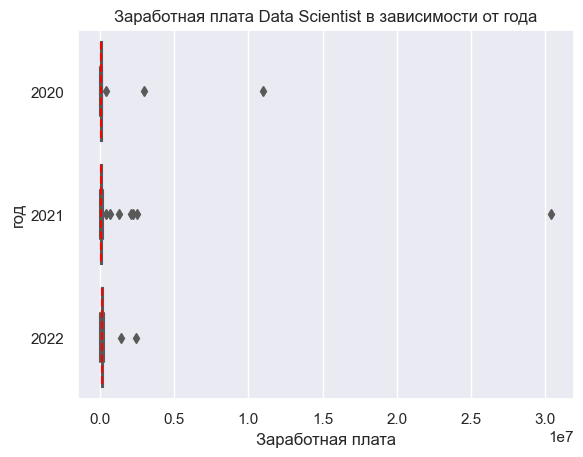

In [244]:
# Заработная плата Data Scientist в зависимости от года
data2=data[mask1]

ax = sns.boxplot(data2, x='salary', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Заработная плата', ylabel='год')
plt.title('Заработная плата Data Scientist в зависимости от года')
plt.show()

In [257]:
data_work_year = data2.groupby('work_year')['salary'].describe().round(0)
print('Заработная плата Data Scientist в зависимости от типа трудоустройства')
data_work_year 

Заработная плата Data Scientist в зависимости от типа трудоустройства


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,744634.0,2435465.0,19000.0,45000.0,60000.0,118000.0,11000000.0
2021,45.0,951508.0,4526444.0,4000.0,58000.0,90000.0,150000.0,30400000.0
2022,77.0,184916.0,297744.0,30000.0,102100.0,140000.0,180000.0,2400000.0


1. Заработная плата Data Scientist не увеличвается с 2022

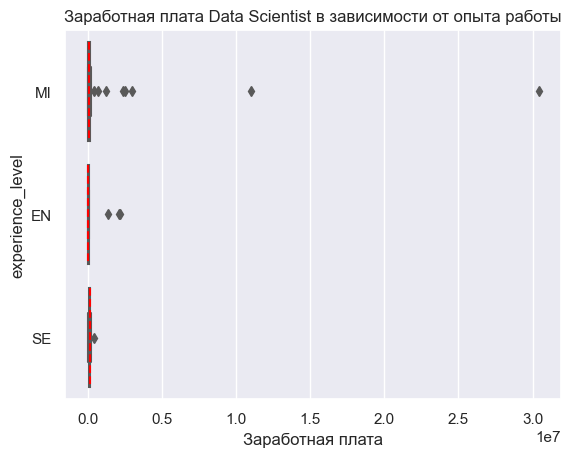

In [246]:
# Заработная плата Data Scientist в зависимости от опыта работы
data2=data[mask1]

ax = sns.boxplot(data2, x='salary', y='experience_level', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Заработная плата', ylabel='experience_level')
plt.title('Заработная плата Data Scientist в зависимости от опыта работы')
plt.show()

In [284]:
data_level = data2.groupby('experience_level')['salary'].describe().round(2)
print('Заработная плата Data Scientist в зависимости от типа трудоустройства')
data_level

Заработная плата Data Scientist в зависимости от типа трудоустройства


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,22.0,311231.82,660796.73,4000.0,40500.0,62250.0,100000.0,2200000.0
MI,60.0,939987.17,4149556.55,21600.0,57250.0,97500.0,142725.0,30400000.0
SE,61.0,154874.10,57691.63,45000.0,123000.0,140400.0,180000.0,412000.0


Заработная плата в Mid level наблюдается самая высокая

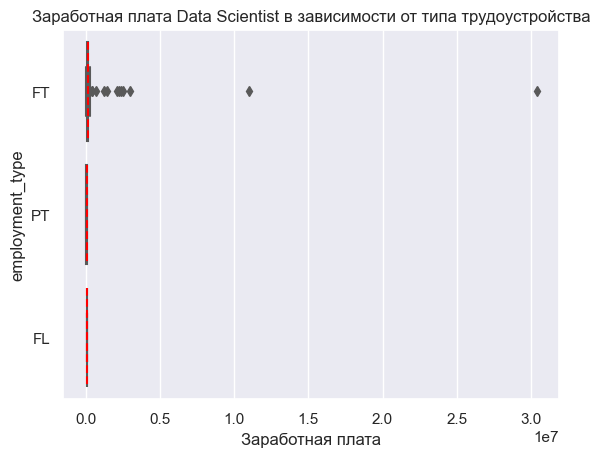

In [247]:
# Заработная плата Data Scientist в зависимости от типа трудоустройства
data2=data[mask1]

ax = sns.boxplot(data2, x='salary', y='employment_type', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Заработная плата', ylabel='employment_type')
plt.title('Заработная плата Data Scientist в зависимости от типа трудоустройства')
plt.show()

In [248]:
data_eml_type = data2.groupby('employment_type')['salary'].describe().round(2)
print('Заработная плата Data Scientist в зависимости от типа трудоустройства')
data_eml_type

Заработная плата Data Scientist в зависимости от типа трудоустройства


,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
FL,1.0,100000.00,NaN,100000.0,100000.0,100000.0,100000.0,100000.0
FT,140.0,517676.07,2741041.31,4000.0,74500.0,123000.0,165055.0,30400000.0
PT,2.0,59500.00,57275.65,19000.0,39250.0,59500.0,79750.0,100000.0


На полный рабочий день самая высокая заработная плата

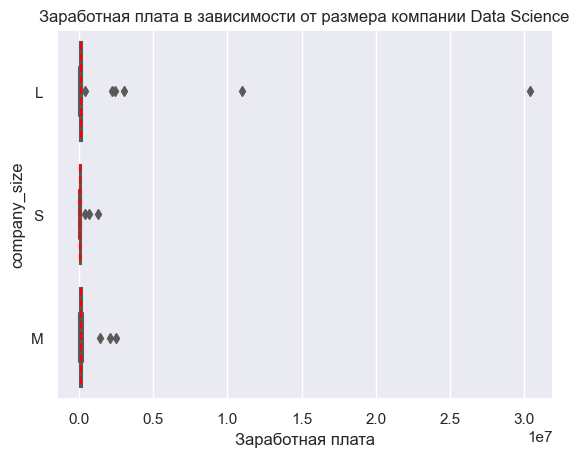

In [126]:
# Заработная плата в зависимости от размера компании Data Science
data2=data[mask1]

ax = sns.boxplot(data2, x='salary', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Заработная плата', ylabel='company_size')
plt.title('Заработная плата в зависимости от размера компании Data Science')
plt.show()

In [249]:
data_company_size = data2.groupby('company_size')['salary'].describe().round(2)
print('Заработная плата Data Scientist в зависимости от типа трудоустройства')
data_company_size

Заработная плата Data Scientist в зависимости от типа трудоустройства


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,45.0,1192693.78,4770865.89,13400.0,73000.0,120000.0,165000.0,30400000.0
M,77.0,201659.35,379422.41,4000.0,95550.0,138600.0,167000.0,2500000.0
S,21.0,166412.38,294119.07,19000.0,45760.0,60000.0,100000.0,1250000.0


Заработная плата в крупных компаниях значительно выше, чем в остальных

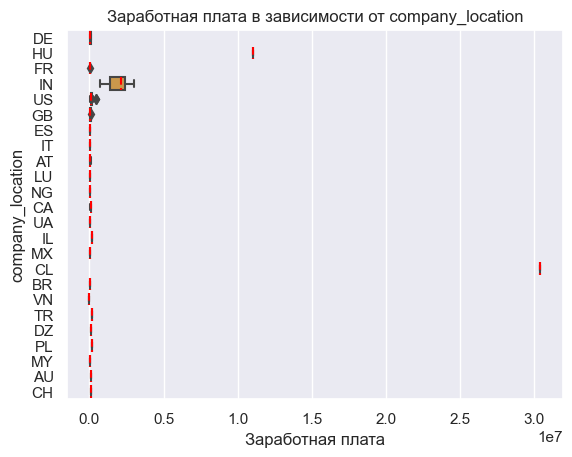

In [127]:
# Заработная плата в зависимости от company_location
data2=data[mask1]

ax = sns.boxplot(data2, x='salary', y='company_location', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Заработная плата', ylabel='company_location')
plt.title('Заработная плата в зависимости от company_location')
plt.show()

Заработная плата от компании зависит не значительно. Признак несущественный

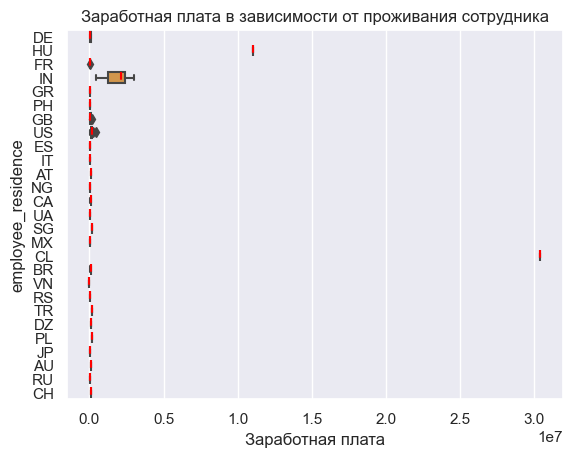

In [316]:
# Заработная плата в зависимости от проживания сотрудника 
data2=data[mask1]

ax = sns.boxplot(data2, x='salary', y='employee_residence', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Заработная плата', ylabel='employee_residence')
plt.title('Заработная плата в зависимости от проживания сотрудника')
plt.show()

In [319]:
data_employee_residence = data2.groupby('employee_residence')['salary'].describe().round(2)
print('Заработная плата Data Scientist в зависимости от employee_residence')
data_employee_residence

Заработная плата Data Scientist в зависимости от employee_residence


,count,mean,std,min,25%,50%,75%,max
employee_residence,,,,,,,,
AT,1.0,80000.00,NaN,80000.0,80000.0,80000.0,80000.0,80000.0
AU,1.0,120000.00,NaN,120000.0,120000.0,120000.0,120000.0,120000.0
BR,2.0,84800.00,21496.05,69600.0,77200.0,84800.0,92400.0,100000.0
CA,6.0,98250.00,21320.76,66500.0,89750.0,97500.0,107500.0,130000.0
CH,1.0,115000.00,NaN,115000.0,115000.0,115000.0,115000.0,115000.0
CL,1.0,30400000.00,NaN,30400000.0,30400000.0,30400000.0,30400000.0,30400000.0
DE,7.0,64102.86,13785.26,43200.0,53500.0,70000.0,75880.0,76760.0
DZ,1.0,100000.00,NaN,100000.0,100000.0,100000.0,100000.0,100000.0
ES,3.0,35200.00,3939.54,32000.0,33000.0,34000.0,36800.0,39600.0


Вывод: большой запрос специалистов из США, однако средние заработные платы выше из Индии (IN)

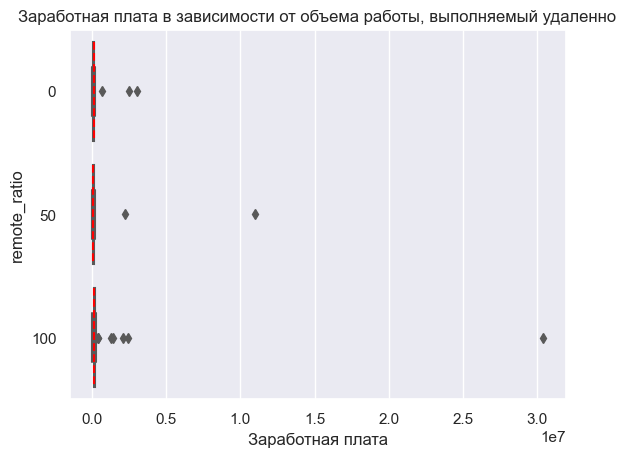

In [128]:
# Заработная плата в зависимости от объема работы, выполненного удаленно
data2=data[mask1]

ax = sns.boxplot(data2, x='salary', y='remote_ratio', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Заработная плата', ylabel='remote_ratio')
plt.title('Заработная плата в зависимости от объема работы, выполняемый удаленно')
plt.show()

In [286]:
data_remote_ratio = data2.groupby('remote_ratio')['salary'].describe().round(2)
print('Заработная плата Data Scientist в зависимости от объема работы, выполняемый удаленно')
data_remote_ratio

Заработная плата Data Scientist в зависимости от объема работы, выполняемый удаленно


,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,39.0,253688.46,600668.94,4000.0,69800.0,100000.0,140850.0,3000000.0
50,25.0,601405.60,2207768.69,19000.0,52000.0,76760.0,120000.0,11000000.0
100,79.0,604615.95,3417085.08,13400.0,100000.0,140000.0,178000.0,30400000.0


За удаленную работу платят больше

2. Больше всего на заработную плату Data science влияет опыт работы, размер компании и соотношение объема работы, 
выполненной удаленно

In [227]:
# создадим dataframe для Data Scientist,Data Engineer
salary_science_eng=data.loc[data['job_title'].isin(['Data Scientist','Data Engineer'])]
salary_science_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 603
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          275 non-null    int64 
 1   work_year           275 non-null    int64 
 2   experience_level    275 non-null    object
 3   employment_type     275 non-null    object
 4   job_title           275 non-null    object
 5   salary              275 non-null    int64 
 6   salary_currency     275 non-null    object
 7   salary_in_usd       275 non-null    int64 
 8   employee_residence  275 non-null    object
 9   remote_ratio        275 non-null    int64 
 10  company_location    275 non-null    object
 11  company_size        275 non-null    object
 12  job                 275 non-null    object
dtypes: int64(5), object(8)
memory usage: 30.1+ KB


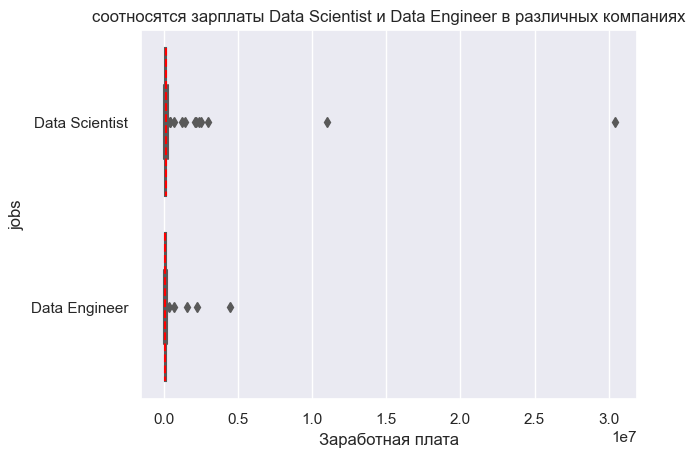

In [228]:
# соотношение зарплат Data Scientist и Data Engineer в различных компаниях

ax = sns.boxplot(salary_science_eng, x='salary', y='job_title', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Заработная плата', ylabel='jobs')
plt.title('соотносятся зарплаты Data Scientist и Data Engineer в различных компаниях')
plt.show()

In [229]:
salary_science_eng1 = salary_science_eng.groupby('job_title')['salary'].describe().round(2)
print('соотношение зарплат Data Scientist и Data Engineer в различных компаниях')
salary_science_eng1

соотношение зарплат Data Scientist и Data Engineer в различных компаниях


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,132.0,179210.55,443986.52,4000.0,65000.0,110000.0,160000.0,4450000.0
Data Scientist,143.0,508347.20,2712691.71,4000.0,74000.0,120160.0,165000.0,30400000.0


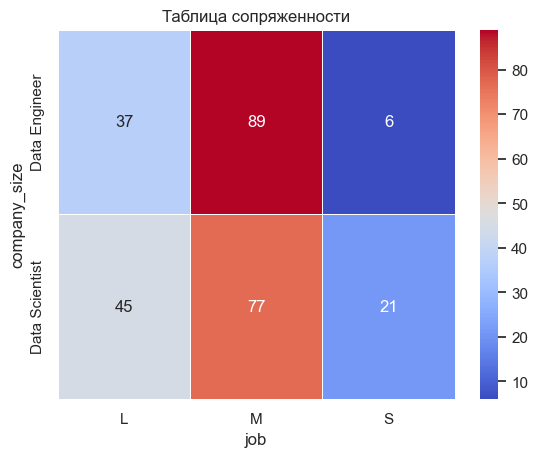

In [230]:
# Соотношение профессий и размера компаний
cross_tab = pd.crosstab(index=salary_science_eng['job_title'], columns=data['company_size'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='job', ylabel='company_size')
plt.title('Таблица сопряженности')
plt.show()

Согласно данным наибольшее количество должностей в средних компаниях

  # Статистический анализ данных

In [158]:
# функция для принятия решения о нормальности
alpha = 0.05
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Наблюдается ли рост заработной платы у специалистов Data Scientist

*Нулевая гипотеза* ($H_0$): медианный уровень заработных плат Data Scintist в 2022 году ($μ_1$) статистически равен медианный уровень заработных плат Data Scintist в 2021 году 951508.

$$ H_0 : μ_1 = 951508$$

*Альтернативная гипотеза* ($H_1$): медианный уровень заработных плат Data Scintist в 2022 году ($μ_1$) больше, медианный уровень заработных плат Data Scintist в 2021 году 951 508.

$$ H_1 : μ_1 > 951508$$

In [287]:
salary_up21 = data2.loc[data2['work_year']==2021, 'salary']
print('salary_up21')
result = stats.shapiro(salary_up21)
decision_normality(result[1])

salary_up22 = data2.loc[data2['work_year']==2022, 'salary']
print('salary_up21')
result = stats.shapiro(salary_up22)
decision_normality(result[1])

salary_up21
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
salary_up21
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


Тип признака: количественный, 1 группа, группа независимая, признак распределен не нормально. 
Подходит тест Критерий знаков для одной группы.

In [289]:
_, p = sign_test(salary_up22, 951508)
print('p-value = {:.3f}'.format(p))
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: отвергаем нулевую гипотезу, размер заработной платы отличается в 2022 году

 Влияет ли опыт работы на заработную плату Data Scientist
 
*Нулевая гипотеза*: размер заработных плат Data Scintist не зависит от опыта: EN ($μ_1$), MI ($μ_2$), SE ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: размер заработных плат Data Scintist зависит от опыта: EN ($μ_1$), MI ($μ_2$), SE ($μ_3$)

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$

In [306]:
#Влияет ли опыт работы на заработную плату Data Scientist 
salary_level_EN = data2.loc[data2['experience_level']=='EN', 'salary']
print('salary_level_EN')
result = stats.shapiro(salary_level_EN)
decision_normality(result[1])

salary_level_MI = data2.loc[data2['experience_level']=='MI', 'salary']
print('salary_level_MI')
result = stats.shapiro(salary_level_MI)
decision_normality(result[1])

salary_level_SE = data2.loc[data2['experience_level']=='SE', 'salary']
print('salary_level_SE')
result = stats.shapiro(salary_level_SE)
decision_normality(result[1])


#EN — Entry-level/Junior; MI — Mid-level/Intermediate; SE — Senior-level/Expert; EX — Executive-level/Director.

salary_level_EN
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
salary_level_MI
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
salary_level_SE
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


Тип признака: количественный, 4 группы (но в одной группе нет данных), группы независимые, признак распределен не нормально. 
Подходит тест Краскера Уоллиса

In [283]:
_, p = stats.kruskal(salary_level_EN, salary_level_MI, salary_level_SE)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Вывод: размер заработной платы зависит от опыта работы

Как соотносятся зарплаты Data Scientist и Data Engineer в разных компаниях


*Нулевая гипотеза* ($H_0$): размер заработных плат Data Scintist ($μ_1$) статистически больше либо равен заработных плат Data Engineer ($μ_2$).

$$ H_0 : μ_1 >= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер заработных плат Data Scintist ($μ_1$) статистически меньше заработных плат Data Engineer ($μ_2$).
$$ H_1 : μ_1 < μ_2$$

In [231]:
salary_data_science = data.loc[data['job_title']=='Data Scientist', 'salary']
print('salary_data_science')
result = stats.shapiro(salary_data_science)
decision_normality(result[1])

print('salary_data_engineer')
salary_data_engineer = data.loc[data['job_title']=='Data Engineer', 'salary']
result = stats.shapiro(salary_data_engineer)
decision_normality(result[1])

salary_data_science
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
salary_data_engineer
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


In [291]:
#Тип признака: количественный, 2 группы, группы независимые, признак распределен не нормально. Подходит U-критерий Манна — Уитни

_, p = stats.mannwhitneyu(salary_data_science, salary_data_engineer, alternative='greater')
decision_hypothesis(p)

p-value = 0.200
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: уровень заработных плат Data Science выше

 4 Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

*Нулевая гипотеза*: между наличем должностей Data Scientist и Data Engineer и размером компании нет взаимосвязи.

*Альтернативная гипотеза*: между наличем должностей Data Scientist и Data Engineer и размером компании есть взаимосвязь.

In [255]:
#Тип признака: категориальный, 2 группы, группы независимые, признак распределен не нормально. Тест хи-квадрат.

cross_table = pd.crosstab(salary_science_eng['experience_level'], data['company_size'])
cross_table

company_size,L,M,S
experience_level,,,
EN,10,15,9
EX,0,4,0
MI,44,56,13
SE,28,91,5


In [256]:
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Взаимосвязт между наличием должностей Data Scientist и Data Engineer и размером компании есть.

## Итоговые результаты исследования

В процессе анализа сделала следующие выводы.

Рост заработных плат Data Scientist меняется, но в 2022 году не можем отвергать что вырос.
  
Факторы влияющие на уровень заработной платы у Data Science: 
* Размер компании (среди крупных компаний уровень зарплаты выше);
* Опыт работы (самый востребованный это Mid Level;
* *Тип трудоустройства (FN – самый высокооплачиваемый);
* Объем работы, выполненный удаленно (предпочтительней на удаленке)
* Увеличенный спрос специалистов из США, однако средние зарплаты выше в Индии (IN)
Не зависит от расположения компании.

Заработные платы Data Scientist выше зарплат Data Engineer, среди уровня это Mid. level.
Cвязь между наличием должностей Data Scientist и Data Engineer и размером компании есть. Анализ показывает, что крупных компаниях заработная плата выше.
